<a href="https://colab.research.google.com/github/abreham-gebremedin/Machine-Learning/blob/main/Visualization_and_predict_Heart_Attack.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Abreham Gebremedin
 (https://abreham-gebremedin.herokuapp.com/)

# Visualization and predict Heart Attack

Heart disease is perceived as the deadliest disease in the human life across the world. In particular, in this 
type of disease the heart is not capable in pushing the required quantity of blood to the remaining organs of the human 
body in order to accomplish the regular functionalities. Some of the symptoms of heart disease include physical 
body weakness, improper breathing, swollen feet, etc. The techniques are essential to identify the complicated heart 
diseases which results in high risk in turn affect the human life. Presently, diagnosis and treatment process are 
highly challenging due to inadequacy of physicians and diagnostic apparatus that affect the treatment of heart patients 
. Early diagnosis of heart disease is significant to minimize the heart related issues and to protect it from serious 
risks. The invasive techniques are implemented to diagnose heart diseases based on medical history, symptom 
analysis report by experts, and physical laboratory report. Moreover, it causes delay and imprecise diagnosis due to 
human intervention. It is time consuming, computationally intensive and expensive at the time of assessment. 
Heart disease can be predicted based on various symptoms such as age, gender, pulse rate etc. Data analysis 
in healthcare assists in predicting diseases, improving diagnosis, analyzing symptoms, providing appropriate 
medicines, improving the quality of care, minimizing cost, extending the life span and reduces the death rate of heart 
patients. ECG (Electro Cardio Gram) helps in screening irregular heart beat and stroke with the embedded sensors by 
resting it on a chest in order to track the patient’s heart beat. Heart disease prediction is being done with the detailed 
clinical data that could assist experts to make decision. Human life is highly dependent on proper functioning of blood 
vessels in the heart. The improper blood circulation causes heart inactiveness, kidney failure, imbalanced condition of 
brain, and even immediate death also. Some of the risk factors that can cause heart diseases are obesity, smoking, 
diabetes, blood pressure, cholesterol, lack of physical activities and unhealthy diet.





In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import confusion_matrix

# load dataset

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/heart.xls')
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [ ]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

# Visualize data and delete outlires

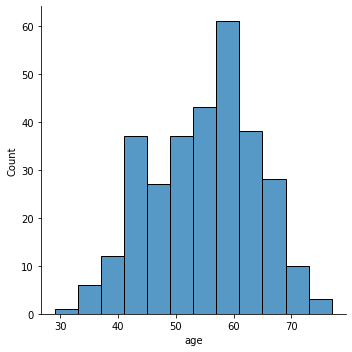

In [ ]:
sns.displot(df['age'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


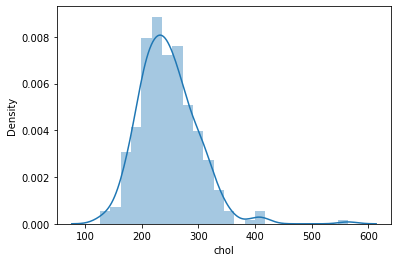

In [ ]:
sns.distplot(df['chol'])

In [ ]:
df.drop(df[df['chol'] > 500].index, inplace = True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


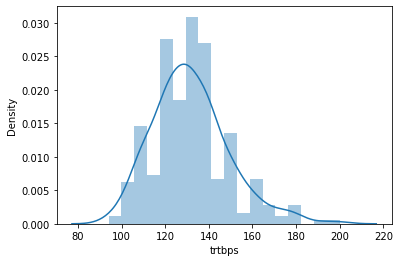

In [ ]:
sns.distplot(df['trtbps'])

In [ ]:
df.drop(df[(df['trtbps'] > 200) | (df['trtbps'] < 90)].index, inplace = True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


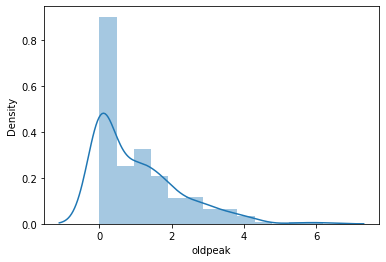

In [ ]:
sns.distplot(df['oldpeak'])

In [ ]:
df.drop(df[df['oldpeak']>4.7].index, inplace = True)

In [ ]:
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


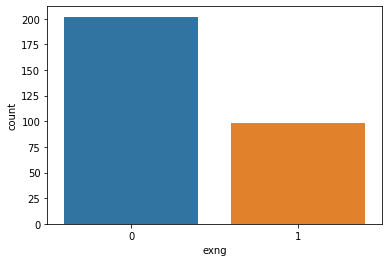

In [ ]:
sns.countplot(df['exng'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


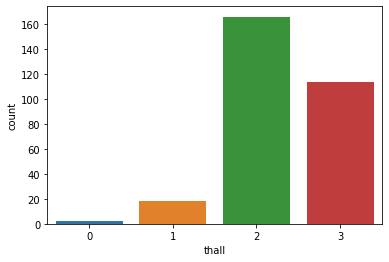

In [ ]:
sns.countplot(df['thall'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


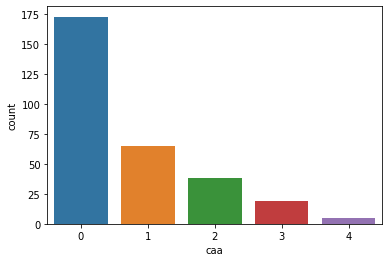

In [ ]:
sns.countplot(df['caa'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


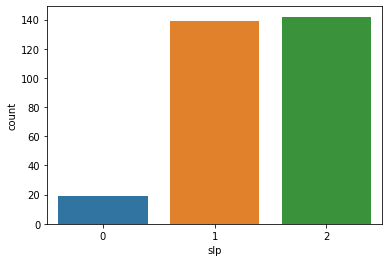

In [ ]:
sns.countplot(df['slp'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


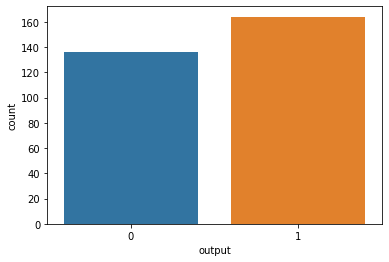

In [ ]:
sns.countplot(df['output'])


# Correlation among features¶


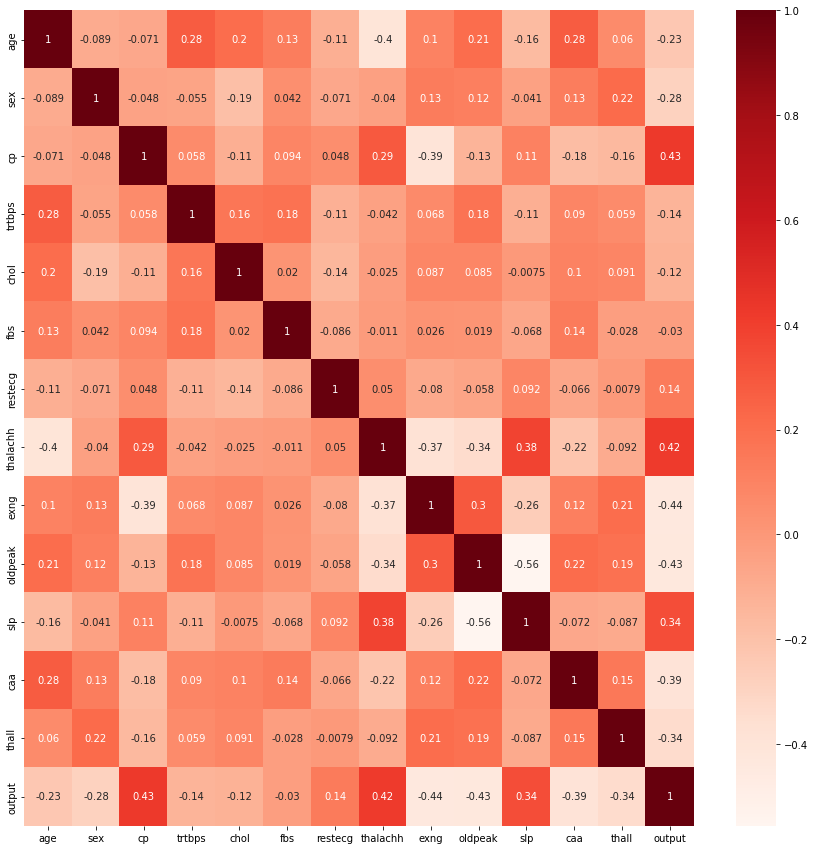

In [ ]:
plt.figure(figsize=(15,15))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()



## Split data


In [ ]:
X = df.drop(columns=['output'])
y = df['output']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True, random_state=44)


# Predict by Models in ML¶




### DecisionTree Model


In [ ]:
DecisionTreeClassifierModel = DecisionTreeClassifier(criterion='entropy',max_depth=5,random_state=44)
DecisionTreeClassifierModel.fit(X_train, y_train)

print('DecisionTreeClassifierModel Train Score is : ' , DecisionTreeClassifierModel.score(X_train, y_train))
print('DecisionTreeClassifierModel Test Score is : ' , DecisionTreeClassifierModel.score(X_test, y_test))

DecisionTreeClassifierModel Train Score is :  0.9285714285714286
DecisionTreeClassifierModel Test Score is :  0.8


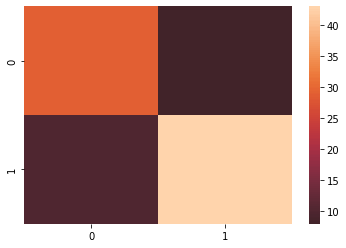

Confusion Matrix is
 [[29  8]
 [10 43]]


In [ ]:
y_pred_DT = DecisionTreeClassifierModel.predict(X_test)
CM_DT = confusion_matrix(y_test, y_pred_DT)
sns.heatmap(CM_DT, center=True)
plt.show()
print('Confusion Matrix is\n', CM_DT)



## RandomForest Model


In [ ]:
RandomForestClassifierModel = RandomForestClassifier(criterion = 'entropy', max_depth=5, n_estimators=400, random_state=44)
RandomForestClassifierModel.fit(X_train, y_train)

print('RandomForestClassifierModel Train Score is : ' , RandomForestClassifierModel.score(X_train, y_train))
print('RandomForestClassifierModel Test Score is : ' , RandomForestClassifierModel.score(X_test, y_test))

RandomForestClassifierModel Train Score is :  0.9666666666666667
RandomForestClassifierModel Test Score is :  0.8555555555555555


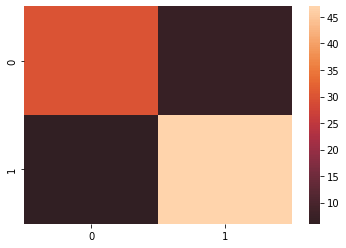

Confusion Matrix is
 [[30  7]
 [ 6 47]]


In [ ]:
y_pred_RF = RandomForestClassifierModel.predict(X_test)
CM_RF = confusion_matrix(y_test, y_pred_RF)

sns.heatmap(CM_RF, center=True)
plt.show()

print('Confusion Matrix is\n', CM_RF)



### Gradient Boosting Model


In [ ]:
GBCModel = GradientBoostingClassifier(n_estimators=200, max_depth=6, learning_rate=0.1, random_state=44)
GBCModel.fit(X_train, y_train)
print('GBCModel Train Score is : ' , GBCModel.score(X_train, y_train))
print('GBCModel Test Score is : ' , GBCModel.score(X_test, y_test))

GBCModel Train Score is :  1.0
GBCModel Test Score is :  0.8111111111111111


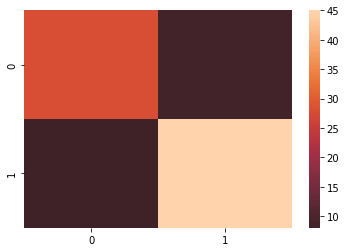

Confusion Matrix is
 [[28  9]
 [ 8 45]]


In [ ]:
y_pred_GB = GBCModel.predict(X_test)
CM_GB = confusion_matrix(y_test, y_pred_GB)

sns.heatmap(CM_GB, center=True)
plt.show()

print('Confusion Matrix is\n', CM_GB)



# Neural Network Model


In [ ]:
MLPClassifierModel = MLPClassifier(activation='relu', # can be also identity , logistic , relu
                                   solver='lbfgs',  # can be also sgd , adam
                                   learning_rate='constant', # can be also invscaling , adaptive
                                   early_stopping= False,
                                   alpha=0.1,hidden_layer_sizes=(300, 3),random_state=33)
MLPClassifierModel.fit(X_train, y_train)

print('MLPClassifierModel Train Score is : ' , MLPClassifierModel.score(X_train, y_train))
print('MLPClassifierModel Test Score is : ' , MLPClassifierModel.score(X_test, y_test))

MLPClassifierModel Train Score is :  0.8380952380952381
MLPClassifierModel Test Score is :  0.8666666666666667


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


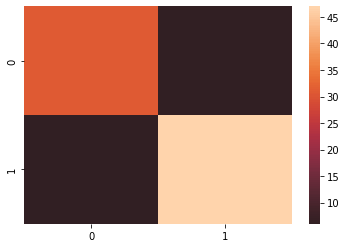

Confusion Matrix is
 [[31  6]
 [ 6 47]]


In [ ]:
y_pred_MLP = MLPClassifierModel.predict(X_test)
CM_MLP = confusion_matrix(y_test, y_pred_MLP)
sns.heatmap(CM_MLP, center=True)
plt.show()
print('Confusion Matrix is\n', CM_MLP)



# Gaussian NB Model


In [ ]:
GaussianNBModel = GaussianNB()
GaussianNBModel.fit(X_train, y_train)

print('GaussianNBModel Train Score is : ' , GaussianNBModel.score(X_train, y_train))
print('GaussianNBModel Test Score is : ' , GaussianNBModel.score(X_test, y_test))

GaussianNBModel Train Score is :  0.819047619047619
GaussianNBModel Test Score is :  0.8777777777777778


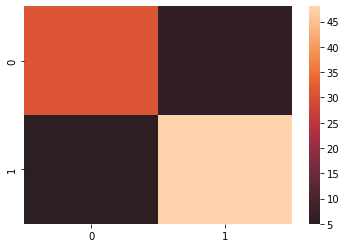

Confusion Matrix is
 [[31  6]
 [ 5 48]]


In [ ]:
y_pred_Gauss = GaussianNBModel.predict(X_test)
CM_Gauss = confusion_matrix(y_test, y_pred_Gauss)
sns.heatmap(CM_Gauss, center=True)
plt.show()
print('Confusion Matrix is\n', CM_Gauss)



# Voting Model


In [ ]:
VotingClassifierModel = VotingClassifier(estimators=[('GBCModel',GBCModel),
                                                     ('RFCModel',RandomForestClassifierModel),
                                                     ('TDCModel',DecisionTreeClassifierModel),
                                                     ('MLPModel',MLPClassifierModel),
                                                     ('GaussianModel',GaussianNBModel)],
                                         voting='hard')
VotingClassifierModel.fit(X_train, y_train)
print('VotingClassifierModel Train Score is : ' , VotingClassifierModel.score(X_train, y_train))
print('VotingClassifierModel Test Score is : ' , VotingClassifierModel.score(X_test, y_test))

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


VotingClassifierModel Train Score is :  0.9523809523809523
VotingClassifierModel Test Score is :  0.8555555555555555


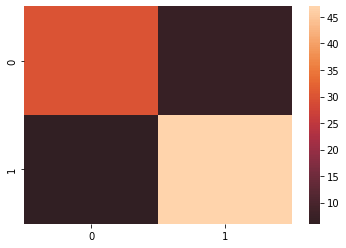

Confusion Matrix is
 [[30  7]
 [ 6 47]]


In [ ]:
y_pred_V = VotingClassifierModel.predict(X_test)
CM_V = confusion_matrix(y_test, y_pred_V)
sns.heatmap(CM_V, center=True)
plt.show()
print('Confusion Matrix is\n', CM_V)